In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(mouse_df, trial_df, on="Mouse ID")



# Display the data table for preview
all_data.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume = all_data.groupby(["Drug", "Timepoint"])
tumorvol_df = pd.DataFrame({
    "Tumor Volume (mm3)": tumor_volume["Tumor Volume (mm3)"].mean()
}).reset_index()


tumorvol_df.head()



# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = pd.DataFrame({"Tumor Volume SEM": tumor_volume["Tumor Volume (mm3)"].sem()}).reset_index()

tumor_error.head()


# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
#tumorvol_reform = pd.pivot_table(tumorvol_df, index =["Timepoint"], columns = ["Drug"])
#tumorerror_reform = pd.pivot_table(tumor_error, index =["Timepoint"], columns = ["Drug"])
#tumorvol_reform.head()

tumorvol_df = tumorvol_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
tumorvol_df.head()



# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
tumor_error = tumor_error.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume SEM')
tumor_error.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


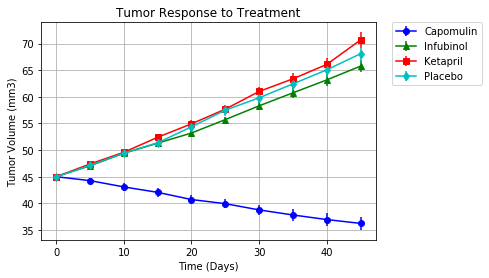

In [7]:
# Generate the Plot (with Error Bars)
xaxis = tumorvol_df.index.values
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
marker =["o", "^", "s", "d"] 
colors = ["b", 'g', 'r', 'c']
index = -1
for drug in drugs:
    means = tumorvol_df[drug]
    error = tumor_error[drug] 
    index += 1
    markerchoice = marker[index]
    labelchoice = drugs[index]
    colorchoice = colors[index]
    
    plt.errorbar(xaxis, means, yerr = error, label = labelchoice, marker = markerchoice, color = colorchoice)


plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()    
        
# Save the Figure



## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_sites = all_data.groupby(["Drug", "Timepoint"])
mets_df = pd.DataFrame({
    "Metastatic Sites": tumor_volume["Metastatic Sites"].mean()
}).reset_index()


mets_df.head()

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_error = all_data.groupby(["Drug", "Timepoint"])
mets_error = pd.DataFrame({
    "Metastatic Sites SEM": tumor_volume["Metastatic Sites"].sem()
}).reset_index()


mets_error.head()


# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
mets_df = mets_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
mets_df.head()

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
mets_error = mets_error.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites SEM')
mets_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


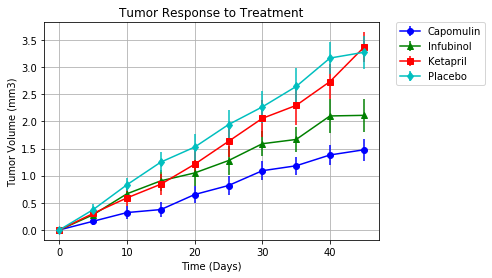

In [12]:
# Generate the Plot (with Error Bars)

xaxis = mets_df.index.values
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
marker =["o", "^", "s", "d"] 
colors = ["b", 'g', 'r', 'c']
index = -1
for drug in drugs:
    means = mets_df[drug]
    error = mets_error[drug] 
    index += 1
    markerchoice = marker[index]
    labelchoice = drugs[index]
    colorchoice = colors[index]
    
    plt.errorbar(xaxis, means, yerr = error, label = labelchoice, marker = markerchoice, color = colorchoice)


plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()    
# Save the Figure

# Show the Figure


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = all_data.groupby(["Drug", "Timepoint"])
mouse_count_df = pd.DataFrame({
    "Mouse Numbers": mouse_count["Mouse ID"].count()
}).reset_index()


mouse_count_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Numbers
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = mouse_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Numbers')
mouse_count_df.head()

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [15]:
mouse_percentages = round((1-((mouse_count_df.iloc[0]-mouse_count_df)/mouse_count_df.iloc[0])) * 100, 2)

mouse_percentages

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


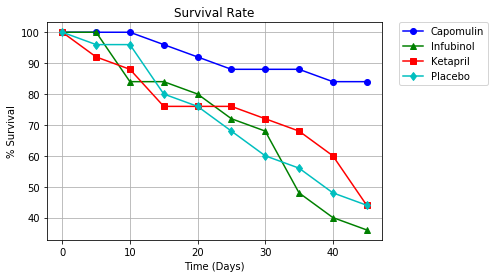

In [16]:
# Generate the Plot (Accounting for percentages)
xaxis = mouse_percentages.index.values
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
marker =["o", "^", "s", "d"] 
colors = ["b", 'g', 'r', 'c']
index = -1

for drug in drugs:
    percentages = mouse_percentages[drug] 
    index += 1
    markerchoice = marker[index]
    labelchoice = drugs[index]
    colorchoice = colors[index]
    
    plt.plot(xaxis, percentages, label = labelchoice, marker = markerchoice, color = colorchoice)


plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.title('Survival Rate')
plt.xlabel('Time (Days)')
plt.ylabel('% Survival')
plt.grid() 

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
tumorvol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [18]:
# Calculate the percent changes for each drug

delta_volume_per_drug = round((tumorvol_df.iloc[-1]-tumorvol_df.iloc[0])/tumorvol_df.iloc[0] * 100, 2)
delta_volume_per_drug


# Display the data to confirm


Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

In [19]:

delta_volume_4_drugs = delta_volume_per_drug.drop(index = ['Ceftamin','Naftisol', 'Propriva', 'Ramicane', 
'Stelasyn', 'Zoniferol'])

delta_volume_4_drugs




Drug
Capomulin   -19.48
Infubinol    46.12
Ketapril     57.03
Placebo      51.30
dtype: float64

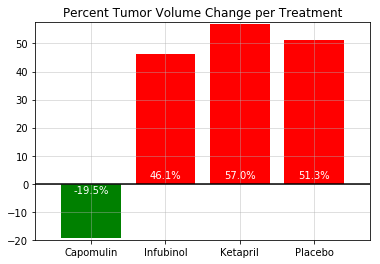

In [20]:
xaxis = delta_volume_4_drugs.index
yaxis = delta_volume_4_drugs

           
plt.bar(xaxis, yaxis, color=['red' if yaxis[r] >0 else 'green' for r in np.arange(len(xaxis))], align="center")
plt.xlim(-0.75, len(xaxis)-0.25)
plt.ylim(min(yaxis)-0.5, max(yaxis)+0.5)
plt.grid(alpha = 0.5)
plt.title("Percent Tumor Volume Change per Treatment")
plt.axhline(y=0, color = 'black')
count = 0
for r in yaxis:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1



